# ABM Project - Initial Set Up - AJ

In [21]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time

In [2]:
def grow_random_network(N):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add an edge between them if it doesn't already exist
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            edges_added += 1
    
    return G, edges_added

In [3]:
N = 10  # Example network size
G, edges_added = grow_random_network(N)

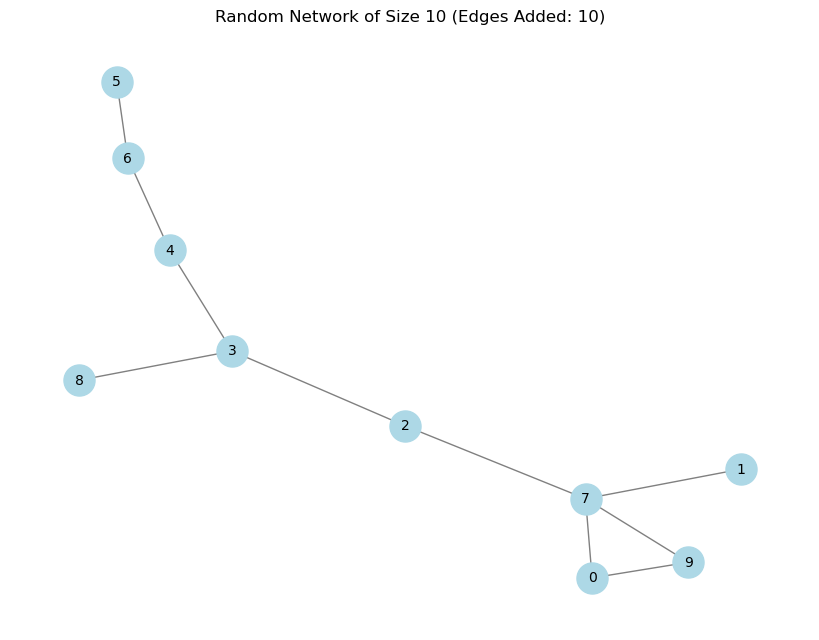

In [4]:
# Plotting the network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title(f"Random Network of Size {N} (Edges Added: {edges_added})")
plt.show()

In [8]:
def grow_bi_directional_network(N):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_weakly_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
    
    return G, edges_added

In [9]:
N = 10  # Example network size
G, edges_added = grow_bi_directional_network(N)

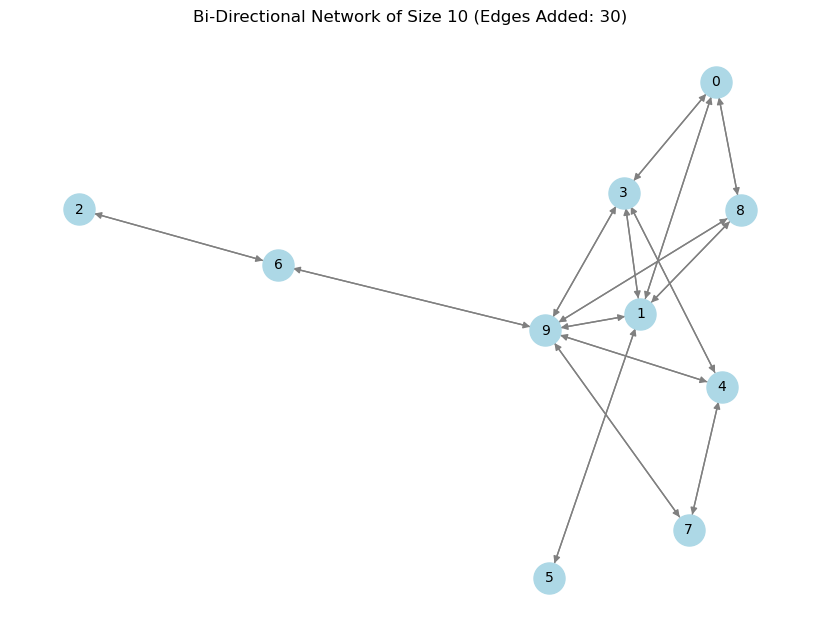

In [10]:
# Plotting the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

In [11]:
def grow_bi_directional_network_with_values(N):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    # Assign a random value (\delta) between 0 and 1 to each node
    for node in G.nodes:
        G.nodes[node]['delta'] = random.random()
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_weakly_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
    
    return G, edges_added

In [12]:
N = 10  # Example network size
G, edges_added = grow_bi_directional_network_with_values(N)

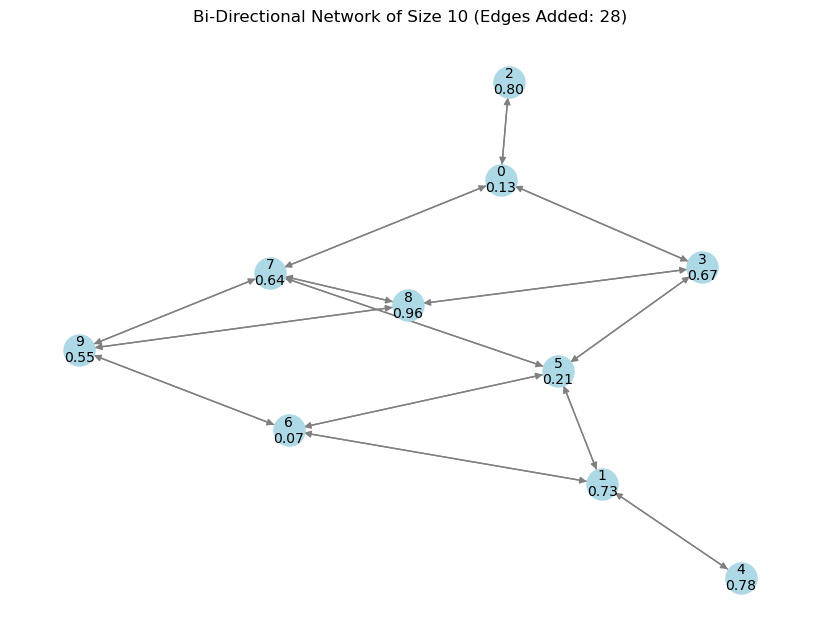

In [13]:
# Plotting the network with node values
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\n{G.nodes[node]["delta"]:.2f}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

In [14]:
def grow_bi_directional_network_with_values(N):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    # Assign a random value (\delta) between 0 and 1 to each node
    for node in G.nodes:
        G.nodes[node]['delta'] = random.random()
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_weakly_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
    
    # Calculate the average value (\Delta_i) of \delta for nodes with connections directed to each node
    for node in G.nodes:
        predecessors = list(G.predecessors(node))
        if predecessors:
            G.nodes[node]['Delta'] = sum(G.nodes[p]['delta'] for p in predecessors) / len(predecessors)
        else:
            G.nodes[node]['Delta'] = 0.0
    
    return G, edges_added

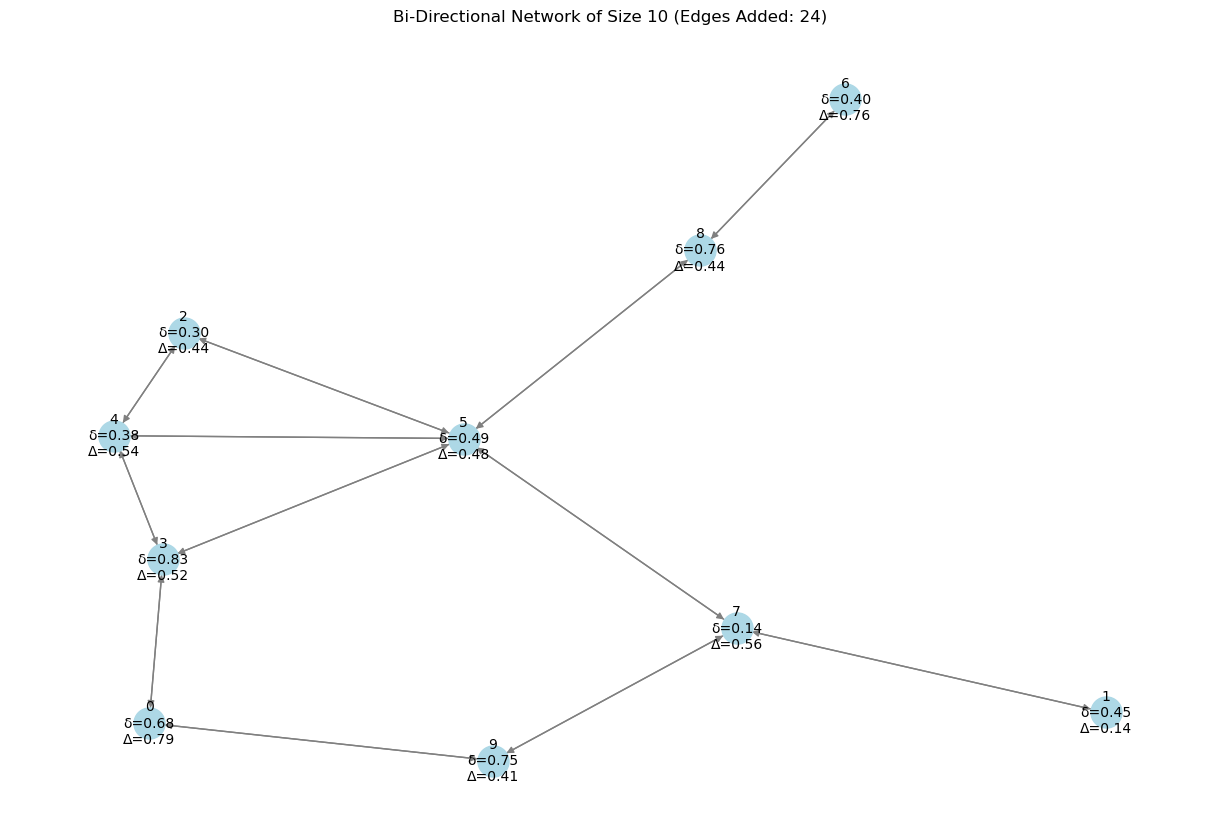

In [15]:
N = 10  # Example network size
G, edges_added = grow_bi_directional_network_with_values(N)

# Plotting the network with node values
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\nδ={G.nodes[node]["delta"]:.2f}\nΔ={G.nodes[node]["Delta"]:.2f}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

In [16]:
def grow_bi_directional_network_with_values(N):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    # Assign a random value (\delta) between 0 and 1 to each node
    for node in G.nodes:
        G.nodes[node]['delta'] = random.random()
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_weakly_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
    
    # Calculate the average value (\Delta_i) of \delta for nodes with connections directed to each node
    for node in G.nodes:
        predecessors = list(G.predecessors(node))
        if predecessors:
            G.nodes[node]['Delta'] = sum(G.nodes[p]['delta'] for p in predecessors) / len(predecessors)
        else:
            G.nodes[node]['Delta'] = 0.0
    
    # Calculate the mean in-degree of the network
    in_degrees = dict(G.in_degree())
    mean_in_degree = sum(in_degrees.values()) / N
    
    # Assign the influencer variable \nu
    for node in G.nodes:
        G.nodes[node]['nu'] = 1 if in_degrees[node] > mean_in_degree else 0
    
    return G, edges_added

In [17]:
N = 10  # Example network size
G, edges_added = grow_bi_directional_network_with_values(N)

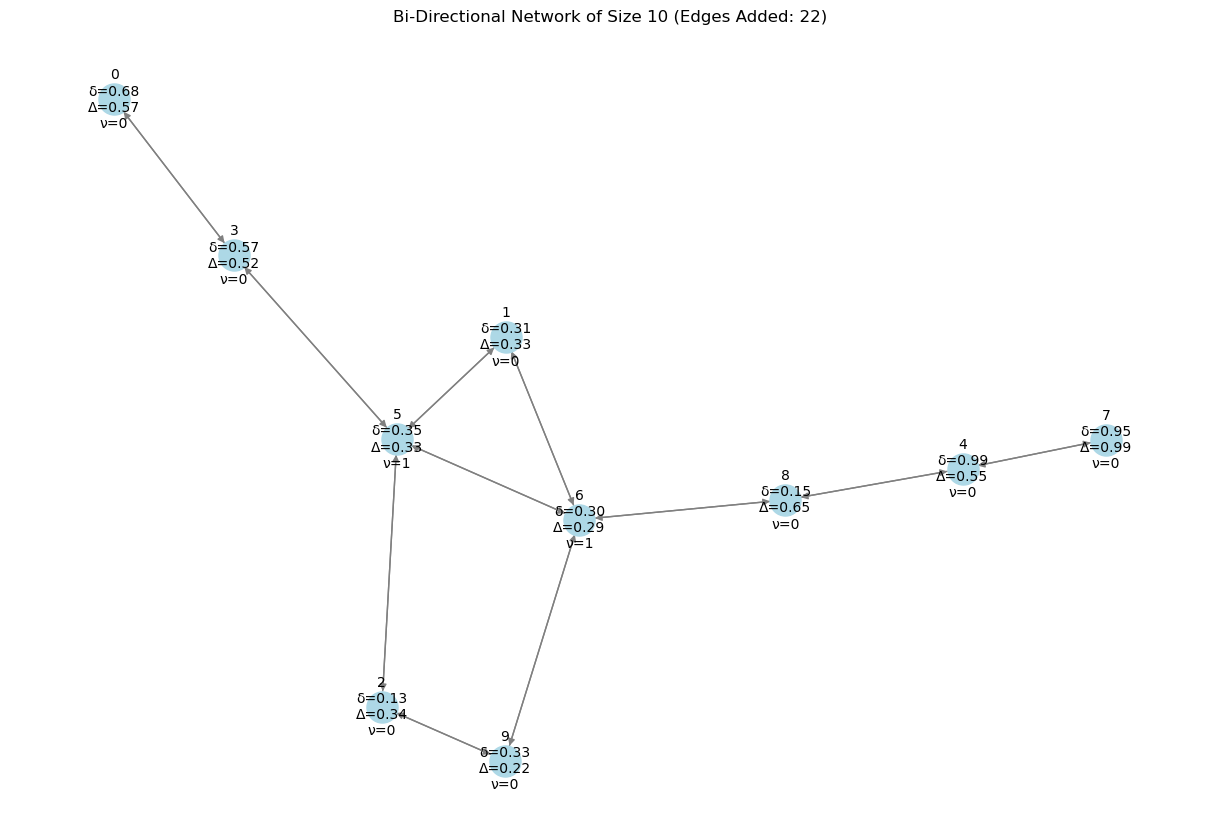

In [18]:
# Plotting the network with node values
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\nδ={G.nodes[node]["delta"]:.2f}\nΔ={G.nodes[node]["Delta"]:.2f}\nν={G.nodes[node]["nu"]}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

In [19]:
def grow_bi_directional_network_with_values(N):
    start_time = time.time()  # Start the timer

    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    # Assign a random value (\delta) between 0 and 1 to each node
    for node in G.nodes:
        G.nodes[node]['delta'] = random.random()
    
    # Initially no edges
    edges_added = 0
    
    while not nx.is_weakly_connected(G):
        # Pick two random nodes
        u, v = random.sample(range(N), 2)
        
        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
    
    # Calculate the average value (\Delta_i) of \delta for nodes with connections directed to each node
    for node in G.nodes:
        predecessors = list(G.predecessors(node))
        if predecessors:
            G.nodes[node]['Delta'] = sum(G.nodes[p]['delta'] for p in predecessors) / len(predecessors)
        else:
            G.nodes[node]['Delta'] = 0.0
    
    # Calculate the mean in-degree of the network
    in_degrees = dict(G.in_degree())
    mean_in_degree = sum(in_degrees.values()) / N
    
    # Assign the influencer variable \nu
    for node in G.nodes:
        G.nodes[node]['nu'] = 1 if in_degrees[node] > mean_in_degree else 0

    end_time = time.time()  # End the timer
    runtime = end_time - start_time  # Calculate the runtime

    return G, edges_added, runtime

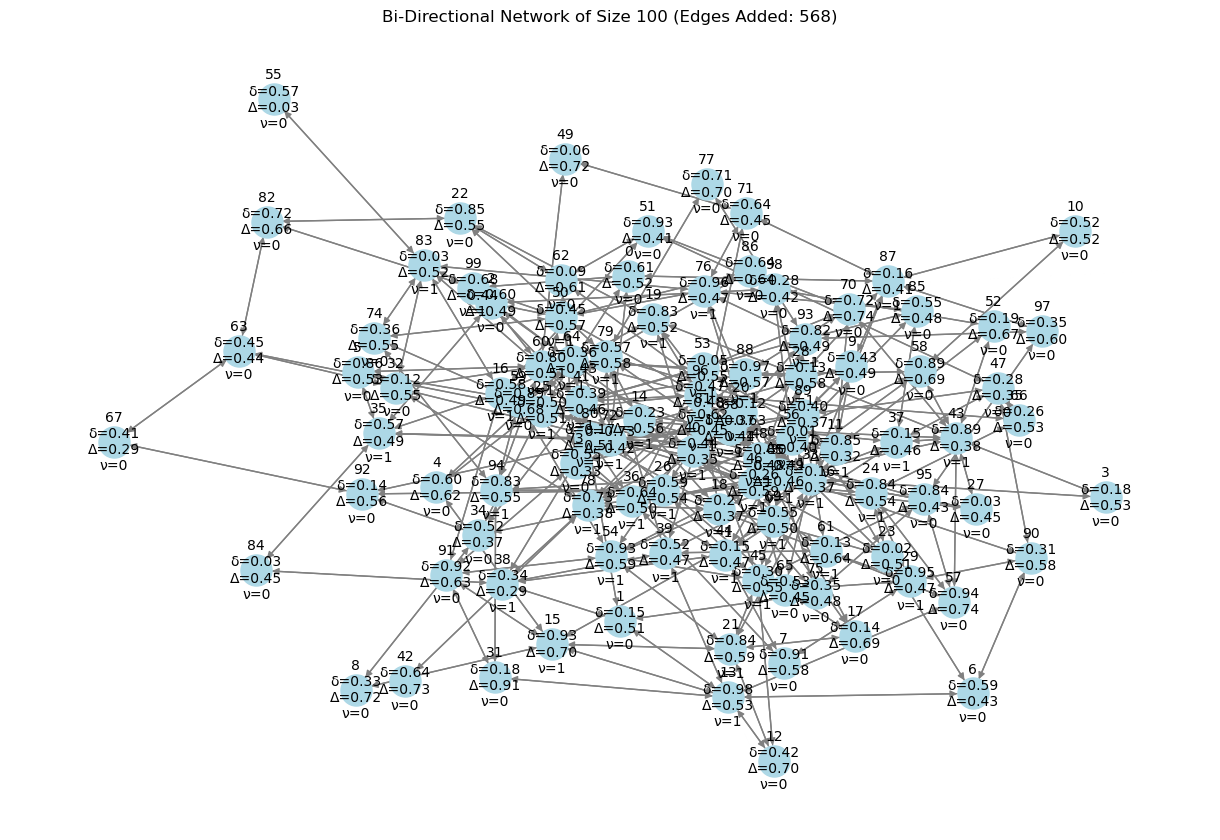

Runtime: 0.0234 seconds


In [22]:
N = 100  # Example network size
G, edges_added, runtime = grow_bi_directional_network_with_values(N)

# Plotting the network with node values
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\nδ={G.nodes[node]["delta"]:.2f}\nΔ={G.nodes[node]["Delta"]:.2f}\nν={G.nodes[node]["nu"]}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

print(f"Runtime: {runtime:.4f} seconds")

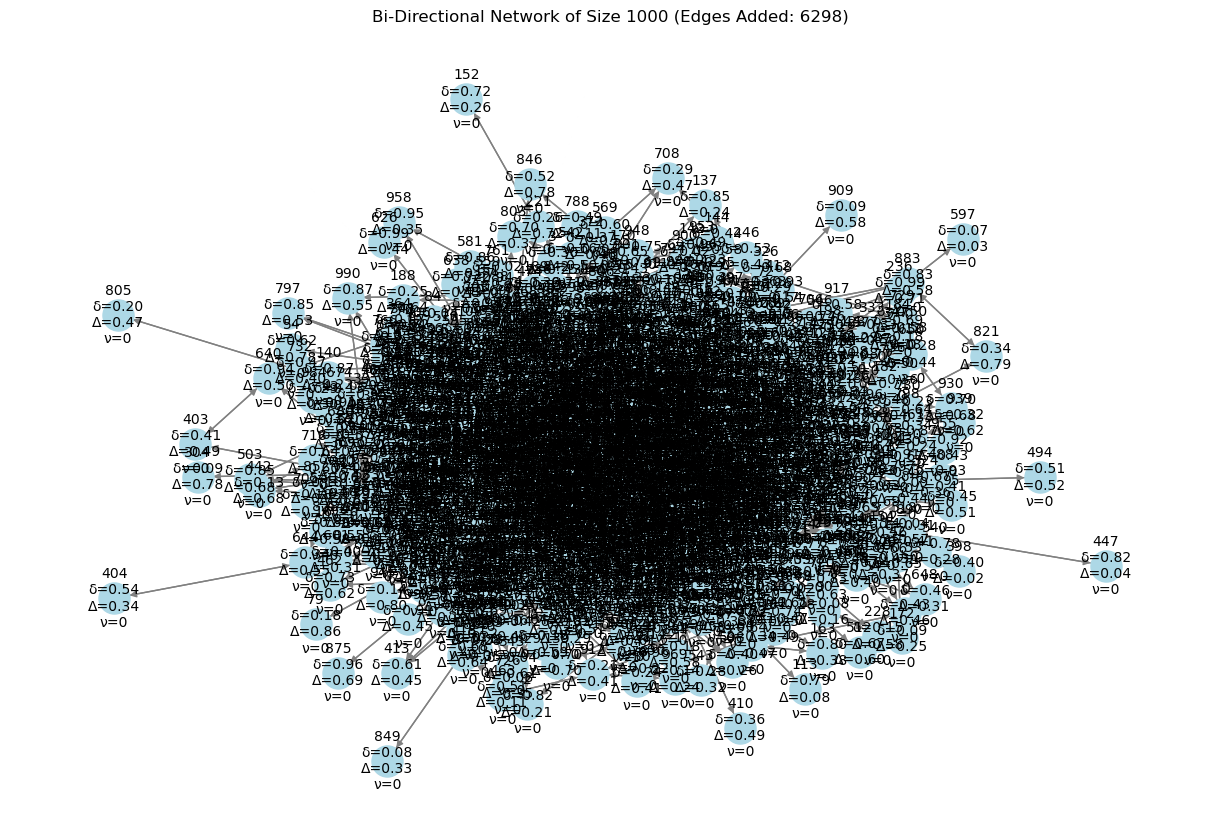

Runtime: 0.7441 seconds


In [23]:
N = 1000  # Example network size
G, edges_added, runtime = grow_bi_directional_network_with_values(N)

# Plotting the network with node values
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\nδ={G.nodes[node]["delta"]:.2f}\nΔ={G.nodes[node]["Delta"]:.2f}\nν={G.nodes[node]["nu"]}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

print(f"Runtime: {runtime:.4f} seconds")

In [25]:
def grow_bi_directional_network_with_values_t(N):
    start_time = time.time()  # Start the timer

    G = nx.DiGraph()
    G.add_nodes_from(range(N))

    # Assign a random value (\delta) between 0 and 1 to each node
    for node in G.nodes:
        G.nodes[node]['delta'] = random.random()

    # Initially no edges
    edges_added = 0

    # Use a list to keep track of connected components to avoid frequent connectivity checks
    connected_components = list(range(N))
    component_size = {i: 1 for i in range(N)}

    def find(node):
        # Path compression heuristic for union-find
        if connected_components[node] != node:
            connected_components[node] = find(connected_components[node])
        return connected_components[node]

    def union(node1, node2):
        # Union by size heuristic for union-find
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if component_size[root1] < component_size[root2]:
                root1, root2 = root2, root1
            connected_components[root2] = root1
            component_size[root1] += component_size[root2]

    while len(set(find(node) for node in range(N))) > 1:
        # Pick two random nodes
        u, v = random.sample(range(N), 2)

        # Add directed edges between them if they don't already exist
        if not G.has_edge(u, v) and not G.has_edge(v, u):
            G.add_edge(u, v)
            G.add_edge(v, u)
            edges_added += 2
            union(u, v)

    # Calculate the average value (\Delta_i) of \delta for nodes with connections directed to each node
    for node in G.nodes:
        predecessors = list(G.predecessors(node))
        if predecessors:
            G.nodes[node]['Delta'] = sum(G.nodes[p]['delta'] for p in predecessors) / len(predecessors)
        else:
            G.nodes[node]['Delta'] = 0.0

    # Calculate the mean in-degree of the network
    in_degrees = dict(G.in_degree())
    mean_in_degree = sum(in_degrees.values()) / N

    # Assign the influencer variable \nu
    for node in G.nodes:
        G.nodes[node]['nu'] = 1 if in_degrees[node] > mean_in_degree else 0

    end_time = time.time()  # End the timer
    runtime = end_time - start_time  # Calculate the runtime

    return G, edges_added, runtime

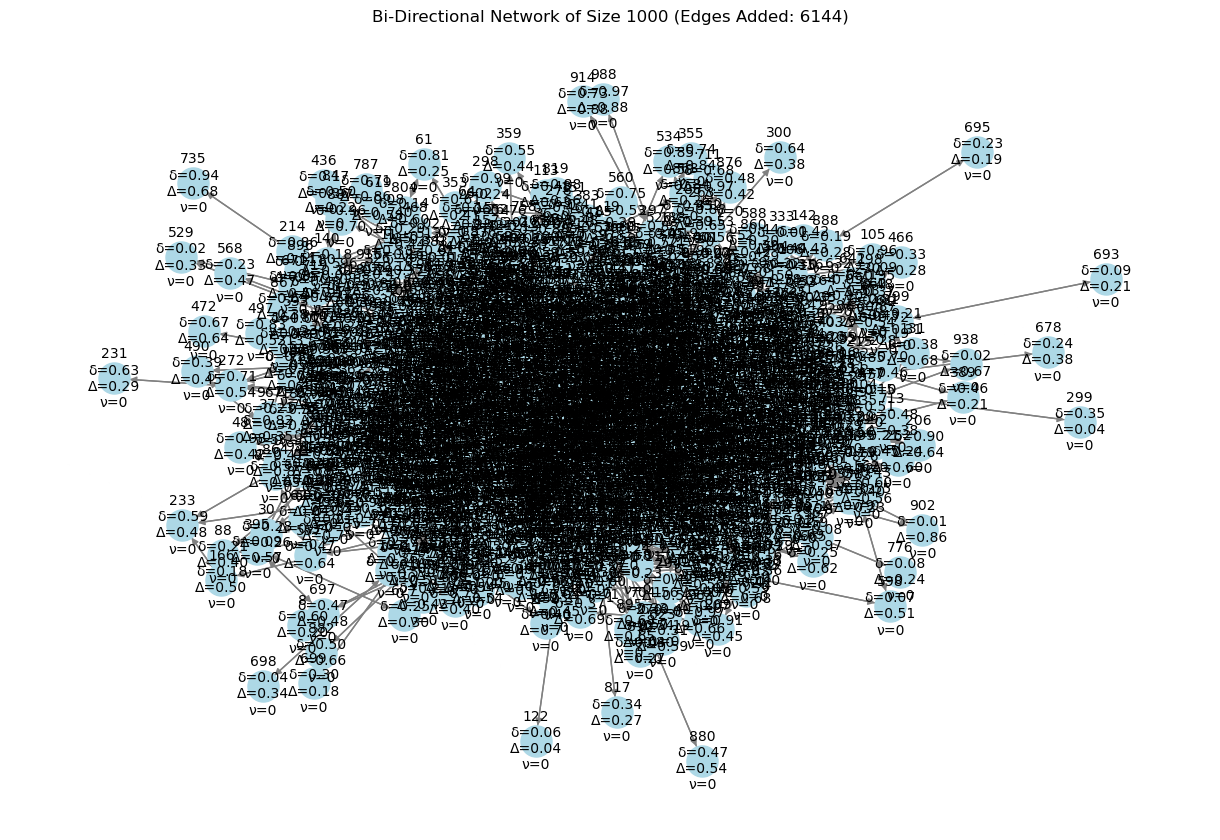

Runtime: 0.3372 seconds


In [26]:
N = 1000  # Example network size
G, edges_added, runtime = grow_bi_directional_network_with_values_t(N)

# Plotting the network with node values
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_labels = {node: f'{node}\nδ={G.nodes[node]["delta"]:.2f}\nΔ={G.nodes[node]["Delta"]:.2f}\nν={G.nodes[node]["nu"]}' for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, arrows=True)
plt.title(f"Bi-Directional Network of Size {N} (Edges Added: {edges_added})")
plt.show()

print(f"Runtime: {runtime:.4f} seconds")